In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
movies_df = pd.read_csv("movie_metadata.csv")
print ("data-frame shape: ", movies_df.shape)

data-frame shape:  (5043, 28)


In [38]:
print ("column names: ", movies_df.columns.values)

column names:  ['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


In [39]:
print(movies_df.isnull().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [40]:
print ("total null values: ", movies_df.isna().sum().sum())

total null values:  2698


In [41]:
clean_movies_df = movies_df.dropna(how='any')

In [42]:
print ("new dataframe shape: ", clean_movies_df.shape)
print ("old dataframe shape:", movies_df.shape)

new dataframe shape:  (3756, 28)
old dataframe shape: (5043, 28)


In [43]:
movies_df.fillna(value=0, inplace = True)

In [44]:
movies_df[['gross', 'budget']] = movies_df[['gross', 'budget']].fillna(value=0)

In [45]:
movies_df['language'].fillna("no info", inplace=True)

In [46]:
movies_df['budget'].fillna(movies_df['budget'].mean(), inplace=True)

In [47]:
duplicate_rows_df = movies_df[movies_df.duplicated()]

In [48]:
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (45, 28)


In [49]:
duplicated_rows_df_imdb_link= movies_df[movies_df.duplicated(['movie_imdb_link'])]

In [50]:
print(movies_df.duplicated(['movie_imdb_link']))

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Length: 5043, dtype: bool


In [51]:
print (duplicated_rows_df_imdb_link.shape)

(124, 28)


In [52]:
op_labels = ['poor', 'moderate', 'good']
category = [0.,4.,7.,10.]
movies_df['imdb_labels'] = pd.cut(movies_df['imdb_score'], labels=op_labels, bins=category)

In [53]:
print (movies_df[['movie_title', 'imdb_score', 'imdb_labels']][100:200])

                                        movie_title  imdb_score imdb_labels
100                       The Fast and the Furious          6.7    moderate
101            The Curious Case of Benjamin Button          7.8        good
102                             X-Men: First Class          7.8        good
103          The Hunger Games: Mockingjay - Part 2          6.6    moderate
104                      The Sorcerer's Apprentice          6.1    moderate
..                                              ...         ...         ...
195       Harry Potter and the Prisoner of Azkaban          7.8        good
196                                      Australia          6.6    moderate
197                                    After Earth          4.9    moderate
198                                       Dinosaur          6.5    moderate
199  Harry Potter and the Deathly Hallows: Part II          7.5        good

[100 rows x 3 columns]


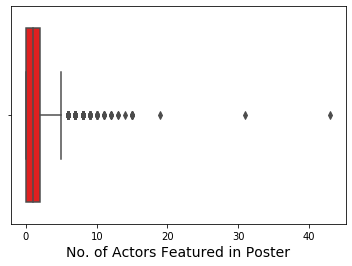

In [54]:
sns.boxplot(x=movies_df['facenumber_in_poster'], color='red')
plt.xlabel('No. of Actors Featured in Poster', fontsize=14)
plt.show()

In [55]:
print (movies_df[['movie_title', 'facenumber_in_poster']].iloc[movies_df['facenumber_in_poster'].idxmax()])

movie_title             500 Days of Summer 
facenumber_in_poster                     43
Name: 3468, dtype: object


In [56]:
print (movies_df['facenumber_in_poster'].describe())

count    5043.000000
mean        1.367638
std         2.012180
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64


In [57]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [58]:
l,u = outlier_treatment(movies_df.facenumber_in_poster)

In [59]:
l

-3.0

In [60]:
u

5.0

In [61]:
movies_df[ (movies_df.facenumber_in_poster > u) | (movies_df.facenumber_in_poster < l) ]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_labels
23,Color,Peter Jackson,509.0,186.0,0.0,773.0,Adam Brown,5000.0,258355354.0,Adventure|Fantasy,...,English,USA,PG-13,225000000.0,2013.0,972.0,7.9,2.35,83000,good
47,Color,Bryan Singer,539.0,149.0,0.0,20000.0,Peter Dinklage,34000.0,233914986.0,Action|Adventure|Fantasy|Sci-Fi|Thriller,...,English,USA,PG-13,200000000.0,2014.0,22000.0,8.0,2.35,82000,good
65,Color,Bryan Singer,396.0,144.0,0.0,1000.0,Michael Fassbender,34000.0,154985087.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,178000000.0,2016.0,13000.0,7.3,2.35,54000,good
73,Color,David Ayer,418.0,123.0,452.0,329.0,Robin Atkin Downes,10000.0,161087183.0,Action|Adventure|Comedy|Sci-Fi,...,English,USA,PG-13,175000000.0,2016.0,336.0,6.9,2.35,80000,moderate
134,Color,Tim Burton,526.0,113.0,13000.0,16000.0,Chloë Grace Moretz,40000.0,79711678.0,Comedy|Fantasy|Horror,...,English,USA,PG-13,100000000.0,2012.0,17000.0,6.2,1.85,82000,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,Color,Cédric Klapisch,29.0,91.0,82.0,8.0,Zinedine Soualem,75.0,1652472.0,Comedy|Romance,...,French,France,R,300000.0,1996.0,9.0,6.9,1.66,166,moderate
4847,Color,Jerome Elston Scott,8.0,98.0,3.0,248.0,Joanna Cassidy,500.0,0.0,Comedy|Drama|Romance,...,English,USA,R,300000.0,2010.0,317.0,7.2,0.00,7,good
4883,Color,Joel Paul Reisig,1.0,108.0,431.0,3.0,Dana Blackstone,288.0,0.0,Family,...,English,USA,PG,250000.0,2014.0,96.0,6.6,0.00,71,moderate
4900,Color,David G. Evans,25.0,101.0,0.0,16.0,Chris Thomas,77000.0,2428241.0,Drama,...,English,USA,PG-13,200000.0,2010.0,21.0,6.4,0.00,0,moderate


In [81]:
movies_df.drop(movies_df[ (movies_df.facenumber_in_poster > u) | (movies_df.facenumber_in_poster < l) ].index , inplace=True)

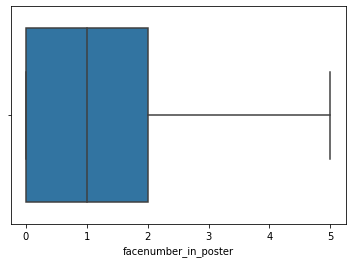

In [82]:
sns.boxplot(movies_df.facenumber_in_poster)

In [86]:
movies_df.dtypes

color                          object
director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_2_name                   object
actor_1_facebook_likes        float64
gross                         float64
genres                         object
actor_1_name                   object
movie_title                    object
num_voted_users                 int64
cast_total_facebook_likes       int64
actor_3_name                   object
facenumber_in_poster          float64
plot_keywords                  object
movie_imdb_link                object
num_user_for_reviews          float64
language                       object
country                        object
content_rating                 object
budget                        float64
title_year                    float64
actor_2_facebook_likes        float64
imdb_score                    float64
aspect_ratio